In [1]:
import scvelo as scv
from IPython.display import clear_output
import matplotlib.backends.backend_pdf
from tqdm import tnrange, tqdm_notebook
import scanpy as sc
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline


scv.logging.print_version()
scv.settings.set_figure_params(
    'scvelo', dpi_save=100, dpi=80, transparent=True)
scv.settings.verbosity = 2

Running scvelo 0.1.16.dev32+c00a55e.dirty (python 3.6.6) on 2021-01-21 10:34.


In [2]:
# paths and names
data_path='G:/data/scSLAMseq/revision/'
signatures_path='G:/data/scrnaseq_signature_collection/'
figure_path='G:/data/figures/heatmaps/'
libraries = ['AB', 'CE', 'DF']
donors=['B2-040', 'C2-019', 'OT227', 'OT302', 'P009T', 'P013T']

## Dynamics

In [3]:
donor=donors[-1]
adata = scv.read(data_path + 'DMSO_only_P013T_ccreg_savemodel.h5')

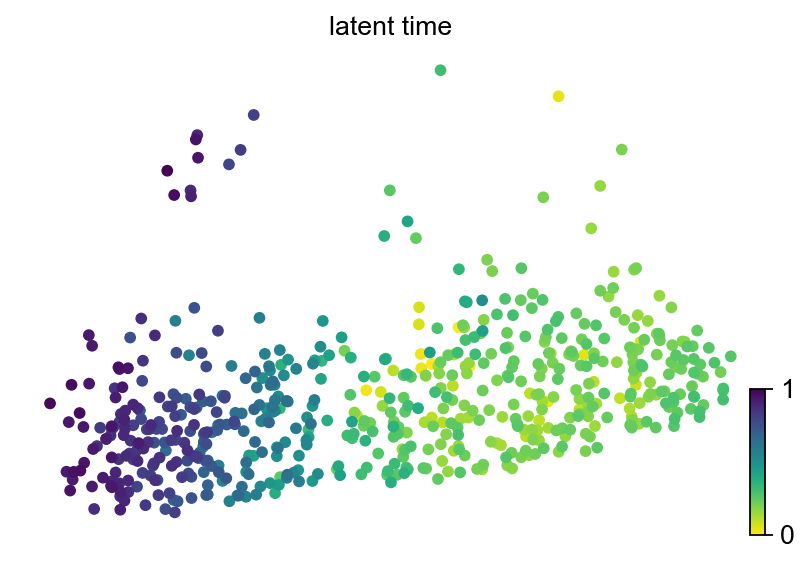

In [35]:
scv.pl.scatter(adata, color='latent_time')

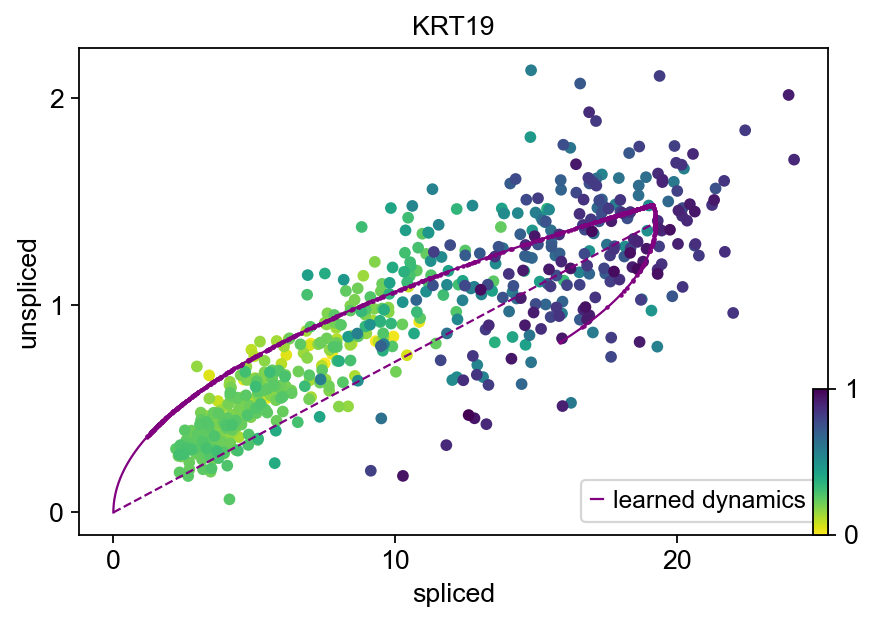

In [33]:
scv.pl.scatter(adata, basis='KRT19', color='latent_time')

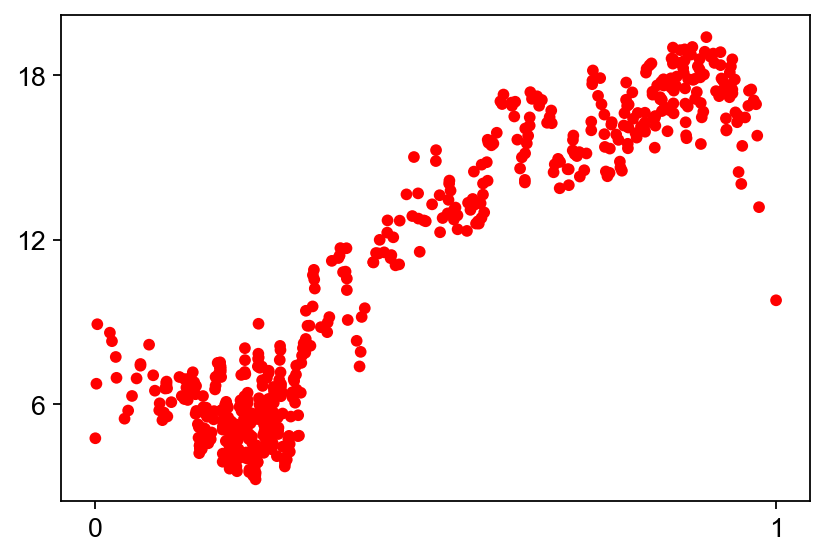

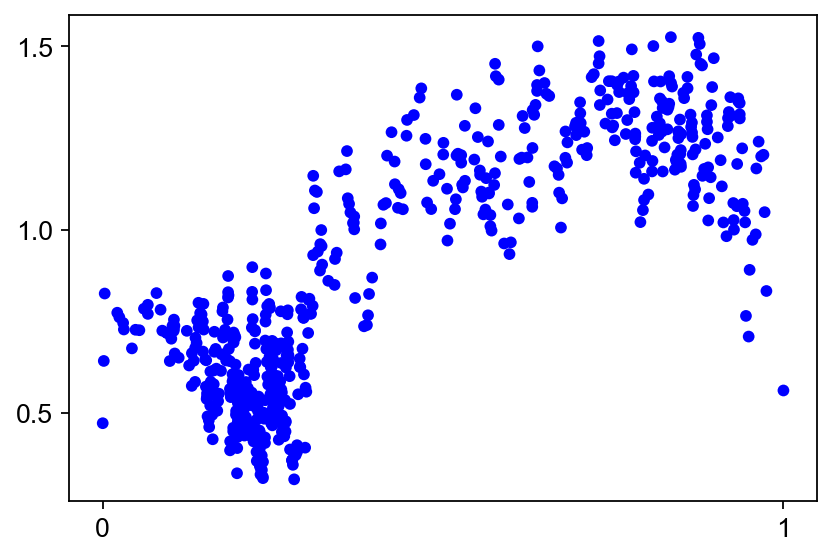

In [31]:
scv.pl.scatter(adata, x=adata.obs['latent_time'], y=adata[:, 'KRT19'].layers['Ms'], n_convolve=5, color='red')
scv.pl.scatter(adata, x=adata.obs['latent_time'], y=adata[:, 'KRT19'].layers['Mu'], n_convolve=5, color='blue')

## KRT19

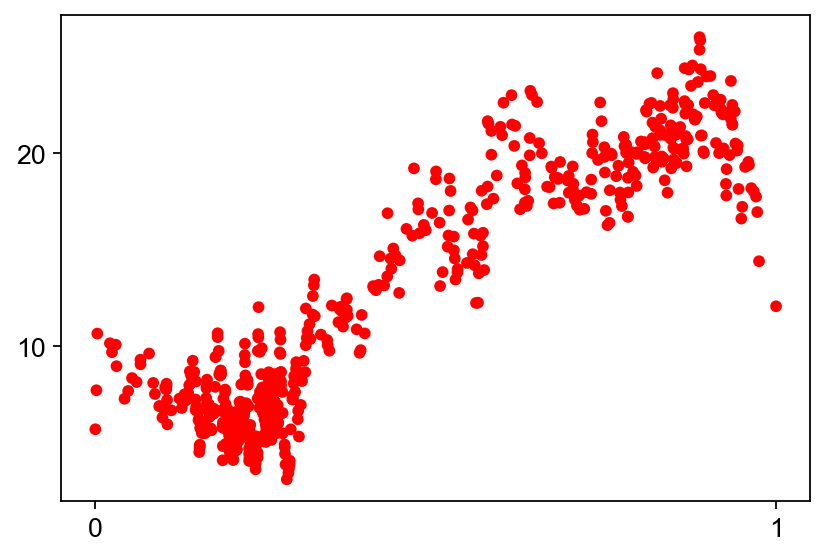

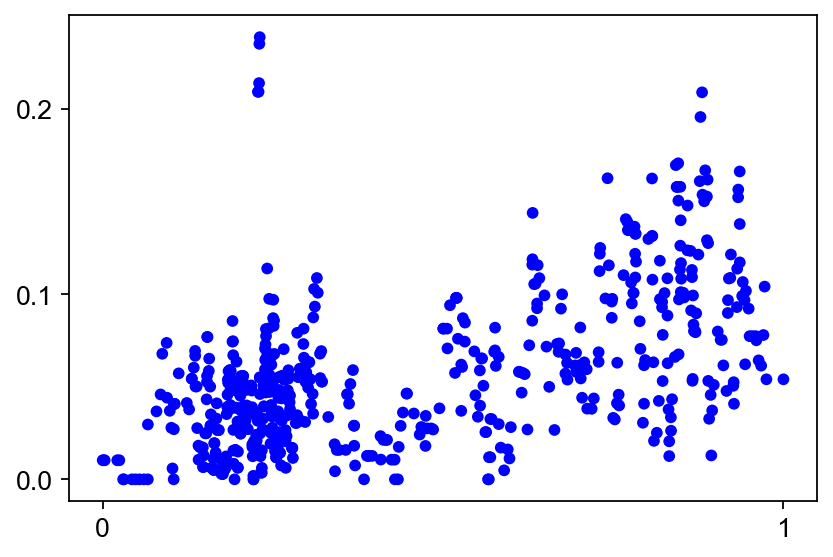

In [50]:
scv.pl.scatter(adata, x=adata.obs['latent_time'], y=bdata[:, 'KRT19'].layers['Ms'], n_convolve=5, color='red')
scv.pl.scatter(adata, x=adata.obs['latent_time'], y=bdata[:, 'KRT19'].layers['Mu'], n_convolve=5, color='blue')

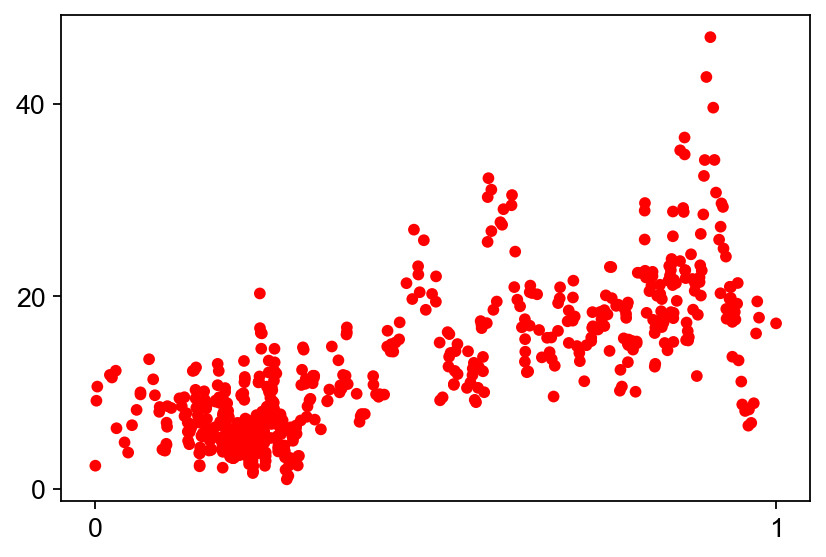

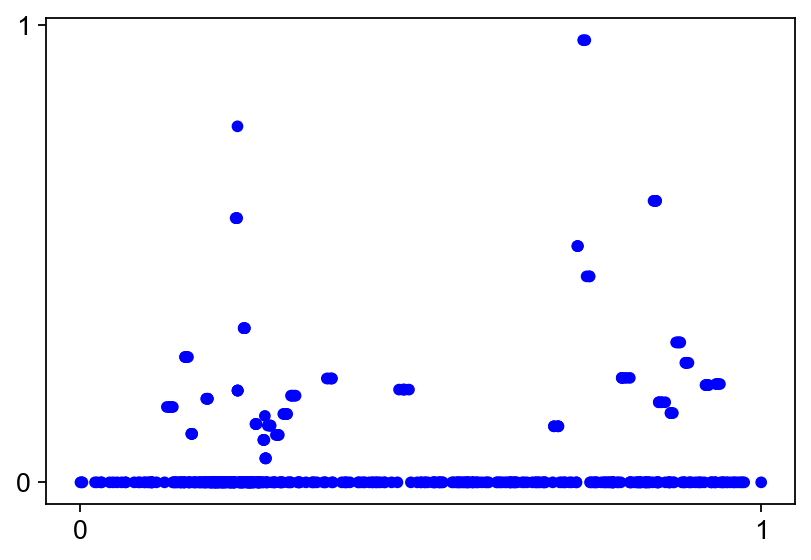

In [48]:
scv.pl.scatter(adata, x=adata.obs['latent_time'], y=bdata[:, 'KRT19'].layers['real_spliced'], n_convolve=5, color='red')
scv.pl.scatter(adata, x=adata.obs['latent_time'], y=bdata[:, 'KRT19'].layers['real_unspliced'], n_convolve=5, color='blue')

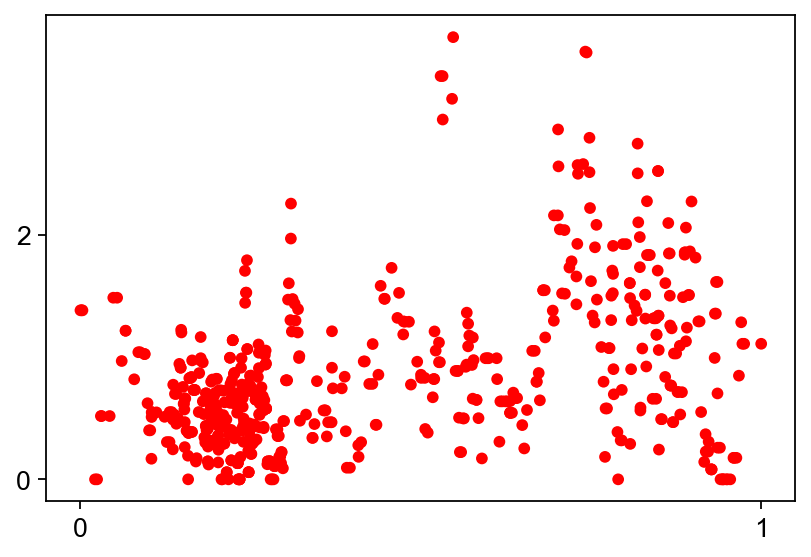

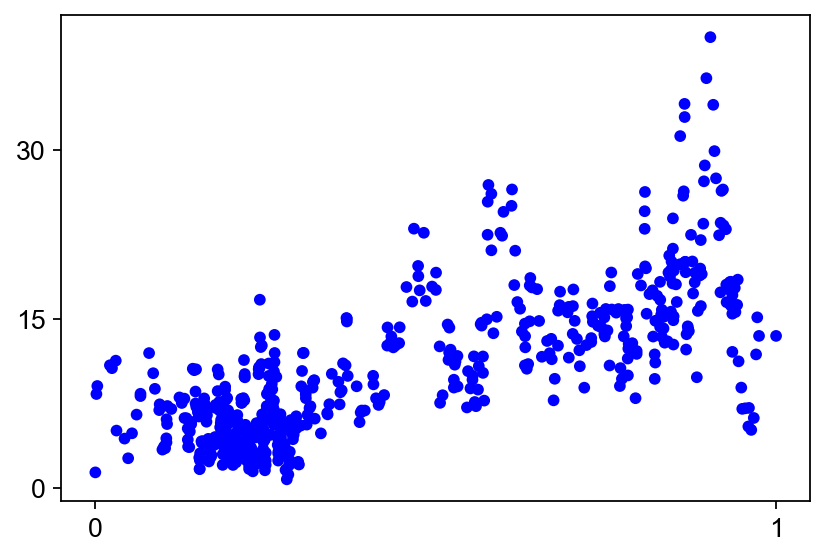

In [54]:
scv.pl.scatter(adata, x=adata.obs['latent_time'], y=bdata[:, 'KRT19'].layers['new'], n_convolve=5, color='red')
scv.pl.scatter(adata, x=adata.obs['latent_time'], y=bdata[:, 'KRT19'].layers['old'], n_convolve=5, color='blue')

## ratios

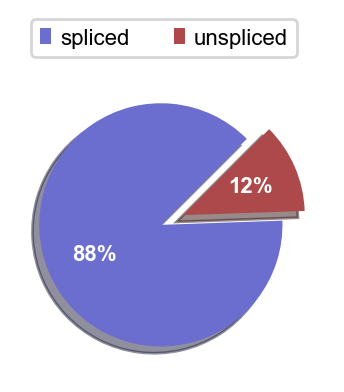

computing moments based on connectivities
    finished (0:00:02)


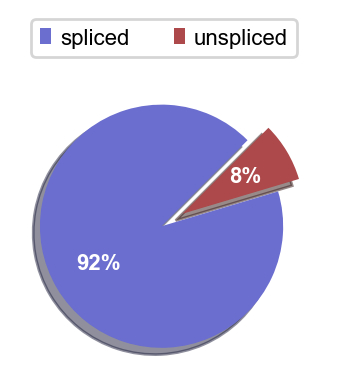

computing moments based on connectivities
    finished (0:00:01)


In [140]:
donor=donors[-1]
bdata = sc.read(data_path+'by_donors/processed/SLAMv2_'+donor+'_processed_ccreg.h5')
# bdata = bdata[bdata.obs.perturbation=='DMSO'].copy()

bdata.layers['spliced']=bdata.layers['real_spliced']
bdata.layers['unspliced']=bdata.layers['real_unspliced']
scv.pl.proportions(bdata)
scv.pp.moments(bdata, n_pcs=30, n_neighbors=30)
bdata.layers['real_Ms']=bdata.layers['Ms']
bdata.layers['real_Mu']=bdata.layers['Mu']

bdata.layers['spliced']=bdata.layers['old']
bdata.layers['unspliced']=bdata.layers['new']

scv.pp.moments(bdata, n_pcs=30, n_neighbors=30)

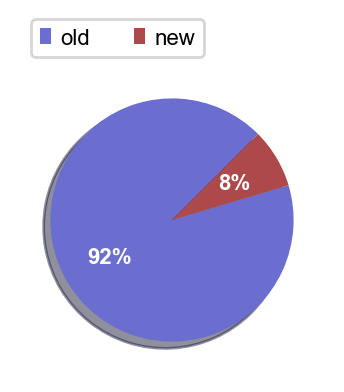

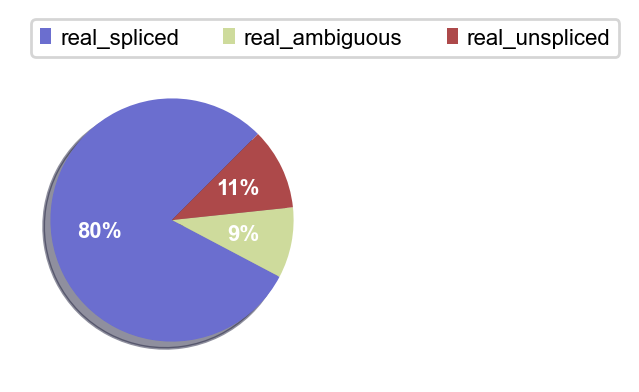

In [144]:
scv.pl.proportions(bdata, layers=['old', 'new'])
scv.pl.proportions(bdata, layers=['real_spliced', 'real_ambiguous', 'real_unspliced'])

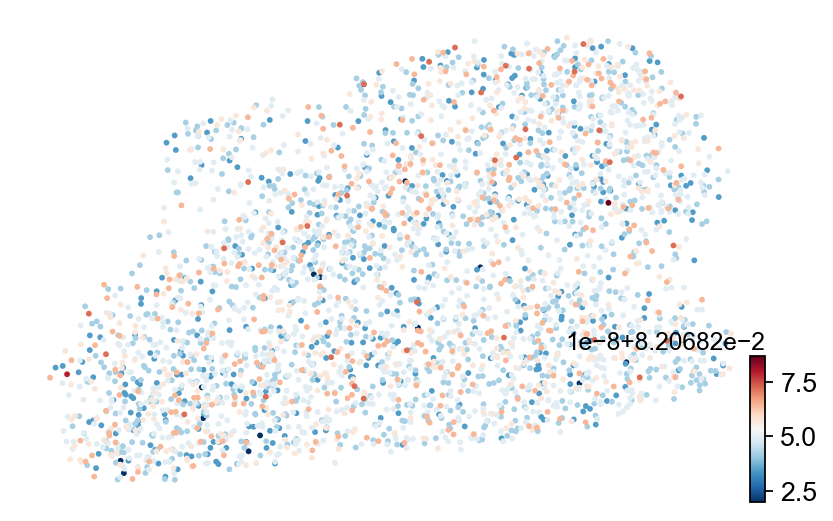

(array([  16.,  149.,  265.,  889.,    0., 1255.,  488.,  335.,   35.,
           2.]),
 array([0.08552986, 0.08552987, 0.08552988, 0.08552989, 0.08552989,
        0.08552989, 0.0855299 , 0.08552991, 0.08552992, 0.08552992,
        0.08552993], dtype=float32),
 <a list of 10 Patch objects>)

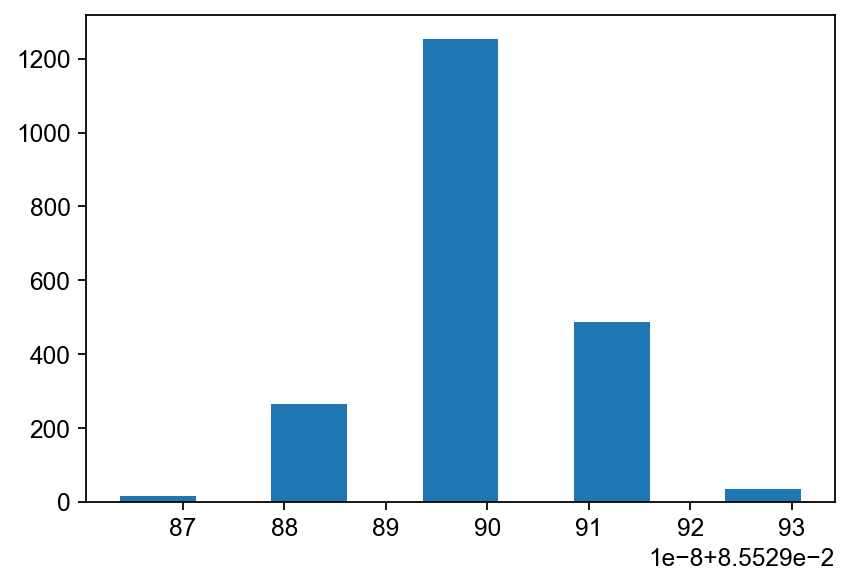

In [107]:
new_to_old_ratio=np.sum(bdata.layers['new'],axis=1) / (np.sum(bdata.layers['old'],axis=1)+1)
scv.pl.scatter(bdata, color=np.log1p(new_to_old_ratio))
pl.hist(new_to_old_ratio)

In [ ]:
new_to_old_ratio=np.sum(bdata.layers['real_unspliced'],axis=1) / (np.sum(bdata.layers['real_spliced'],axis=1)+1)
scv.pl.scatter(bdata, color=np.log1p(new_to_old_ratio))
pl.hist(new_to_old_ratio)

Text(0.5, 1.0, 'P013T SLAM vs Classical layers')

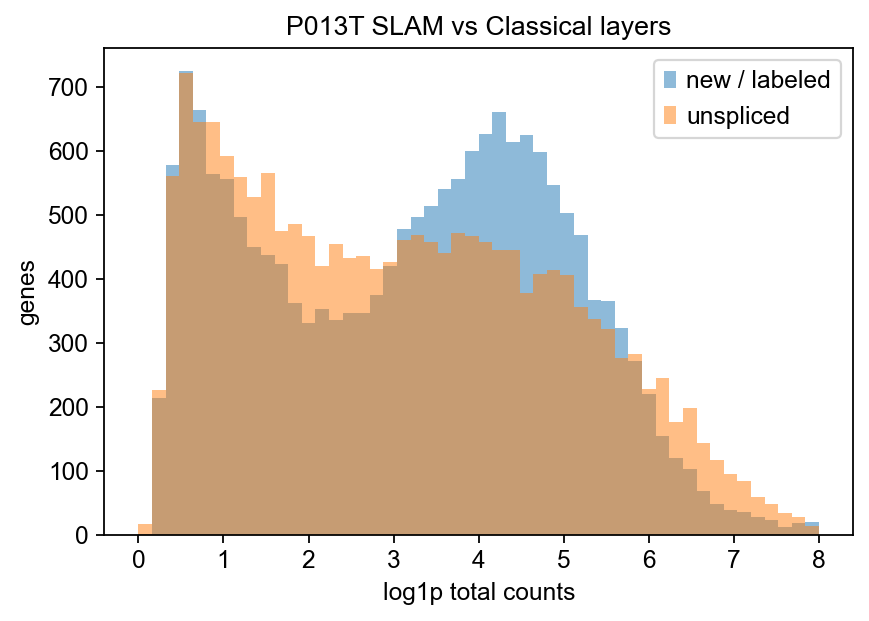

In [116]:
u=np.squeeze(np.array(np.sum(bdata.layers['real_unspliced'],axis=0)))
s=np.squeeze(np.array(np.sum(bdata.layers['real_spliced'],axis=0)))
n=np.squeeze(np.array(np.sum(bdata.layers['new'],axis=0)))
o=np.squeeze(np.array(np.sum(bdata.layers['old'],axis=0)))

m=0
pl.hist(np.log1p(n[n>m]), alpha=0.5, range=[0,8], bins=50)
pl.hist(np.log1p(u[u>m]), alpha=0.5, range=[0,8], bins=50)
pl.legend(['new / labeled', 'unspliced'])
pl.xlabel('log1p total counts')
pl.ylabel('genes')
pl.title(donor+' SLAM vs Classical layers')

Text(0.5, 1.0, 'P013T SLAM vs Classical layers')

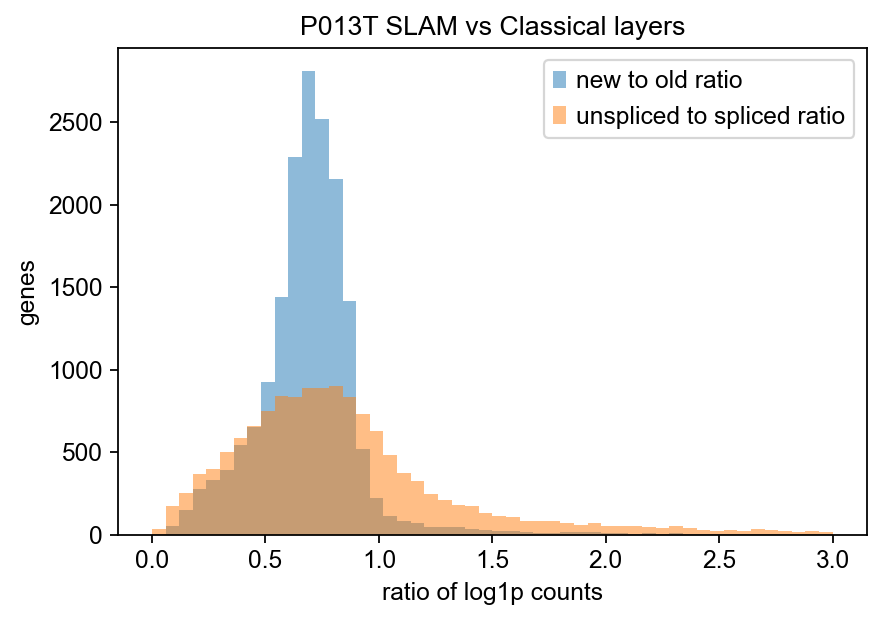

In [113]:
m=0
pl.hist(np.log1p(n[(o>m) & (n>m)])/np.log1p(o[(o>m) & (n>m)]), alpha=.5, range=[0,3], bins=50)
pl.hist(np.log1p(u[(s>m) & (u>m)])/np.log1p(s[(s>m) & (u>m)]), alpha=0.5, range=[0,3], bins=50)
pl.legend(['new to old ratio', 'unspliced to spliced ratio'])
pl.xlabel('ratio of log1p counts')
pl.ylabel('genes')
pl.title(donor+' SLAM vs Classical layers')

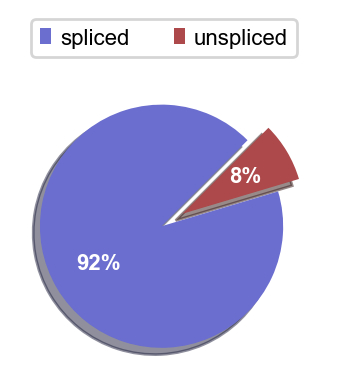

In [139]:
scv.pl.proportions(bdata)

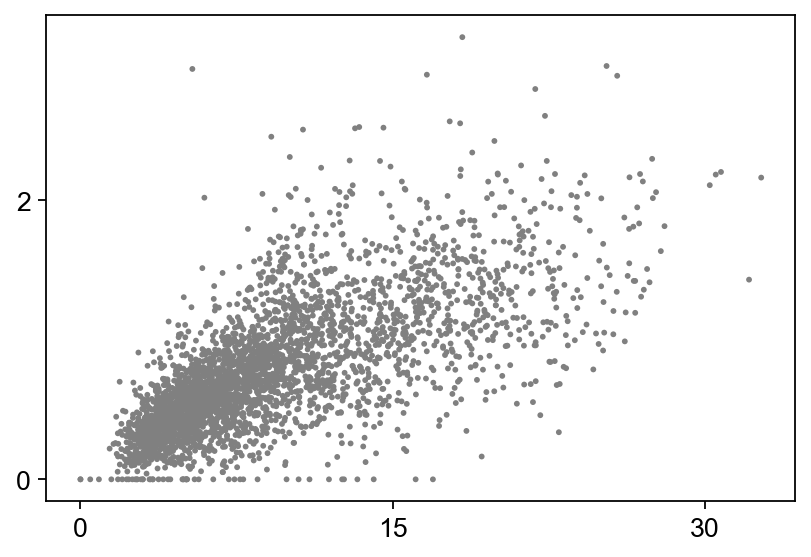

In [174]:
scv.pl.scatter(bdata, x=bdata[:,'KRT19'].layers['Ms']+bdata[:,'KRT19'].layers['Mu'], y=bdata[:,'KRT19'].layers['Mu'])

In [154]:
'KMT2A' in bdata.var_names

True

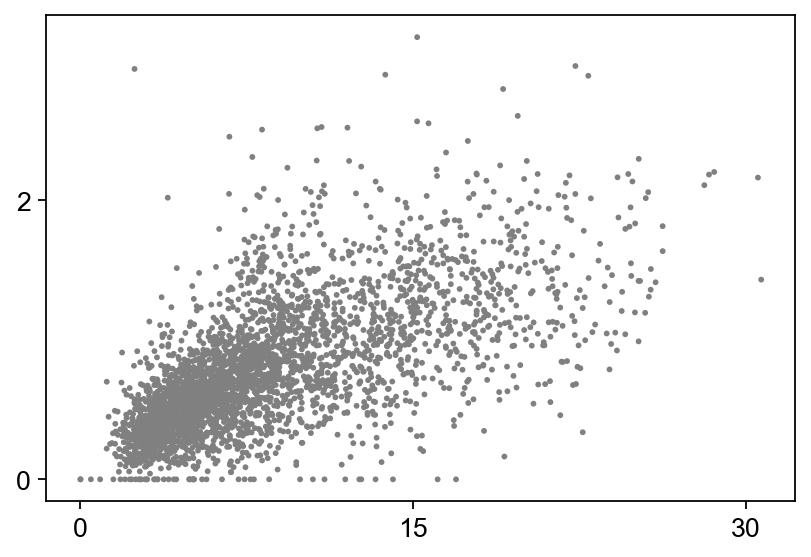

In [173]:
scv.pl.scatter(bdata, x=bdata[:,'KRT19'].layers['Ms'], y=bdata[:,'KRT19'].layers['Mu'])

## KMT2A and GATA4/6

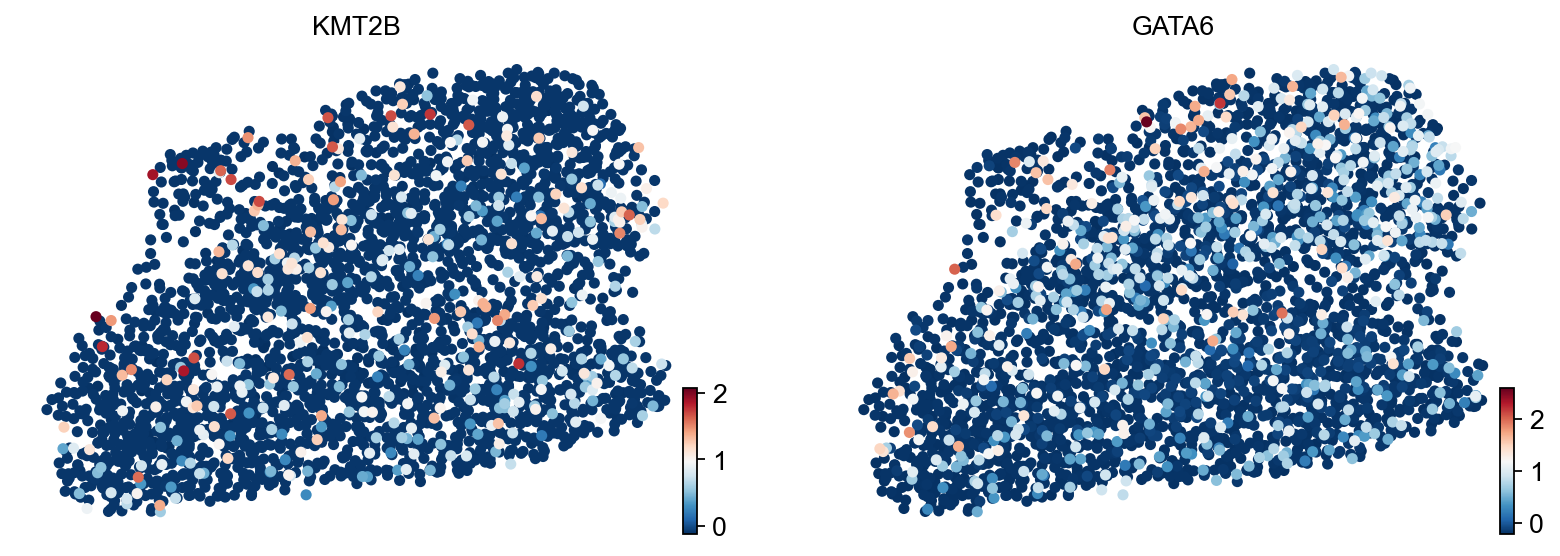

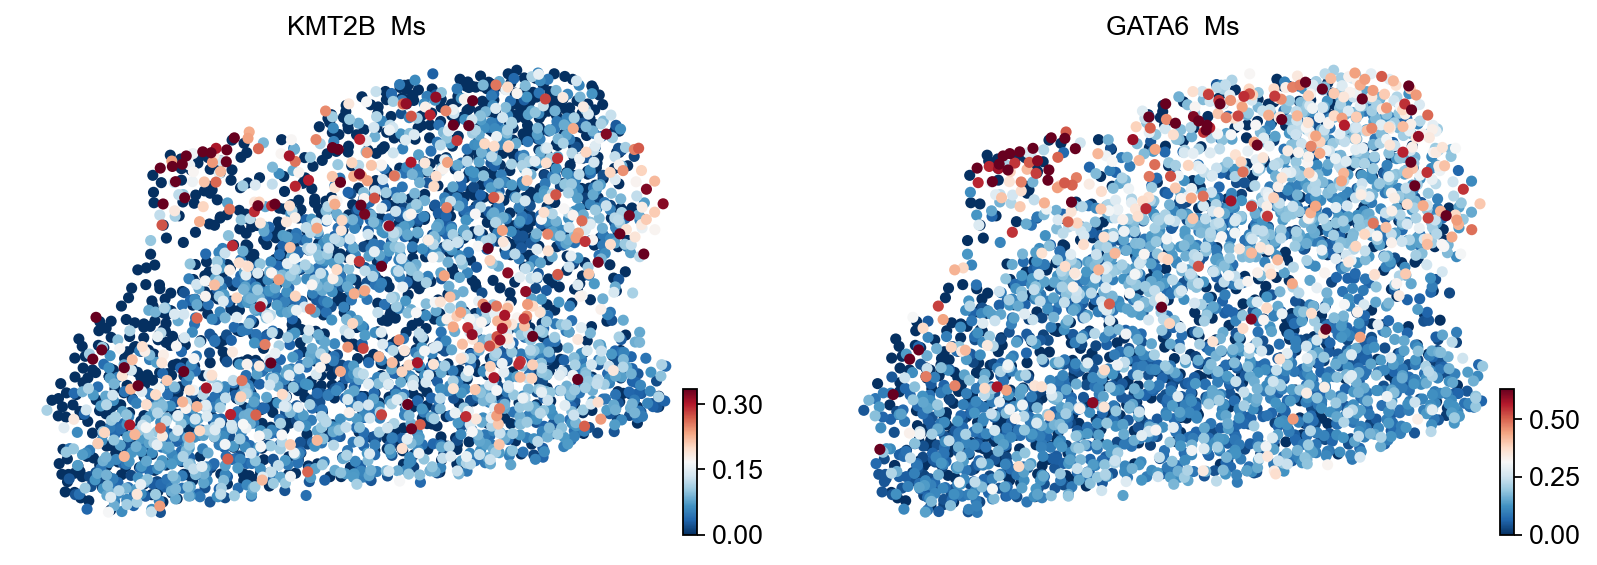

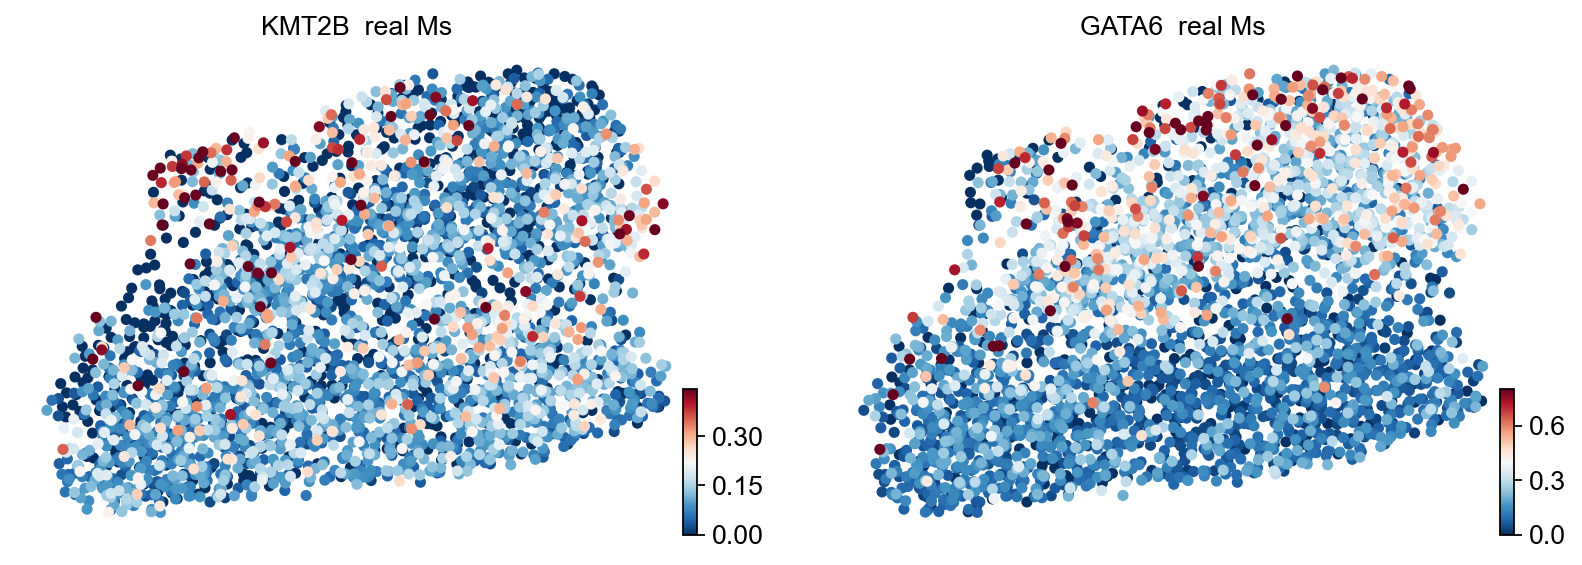

In [172]:
scv.pl.scatter(bdata, color=['KMT2A', 'GATA6'], size=100)
scv.pl.scatter(bdata, color=['KMT2A', 'GATA6'], size=100, layer='Ms')
scv.pl.scatter(bdata, color=['KMT2A', 'GATA6'], size=100, layer='real_Ms')

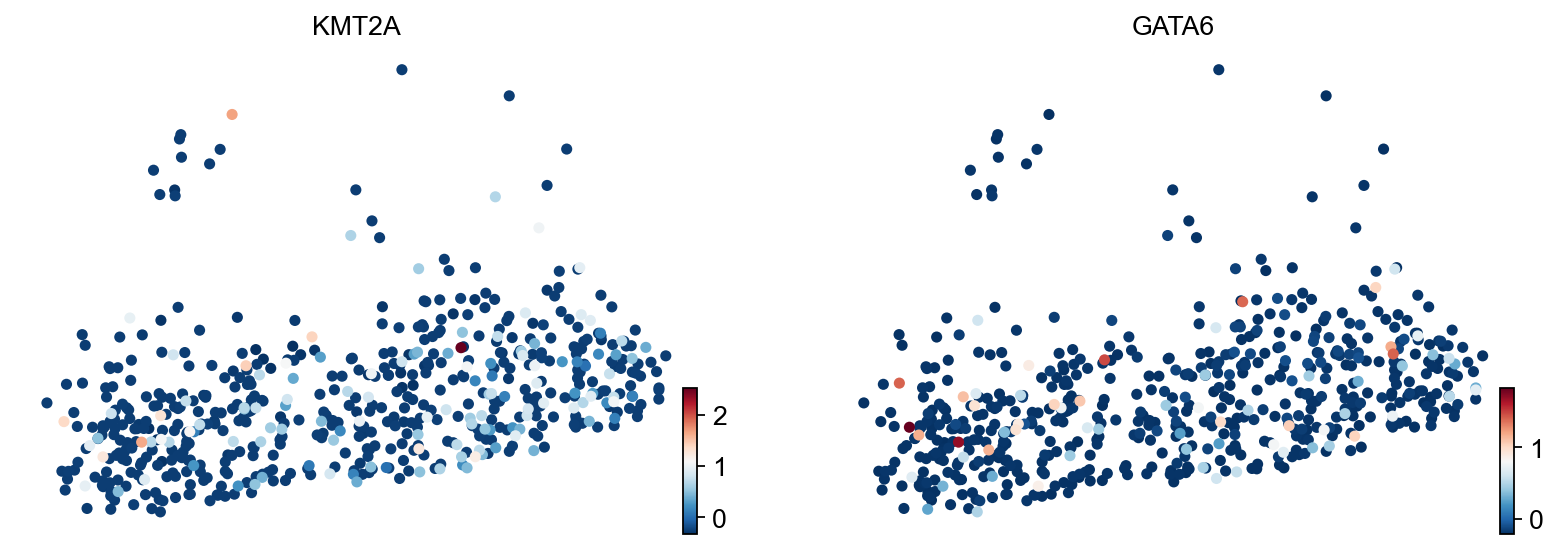

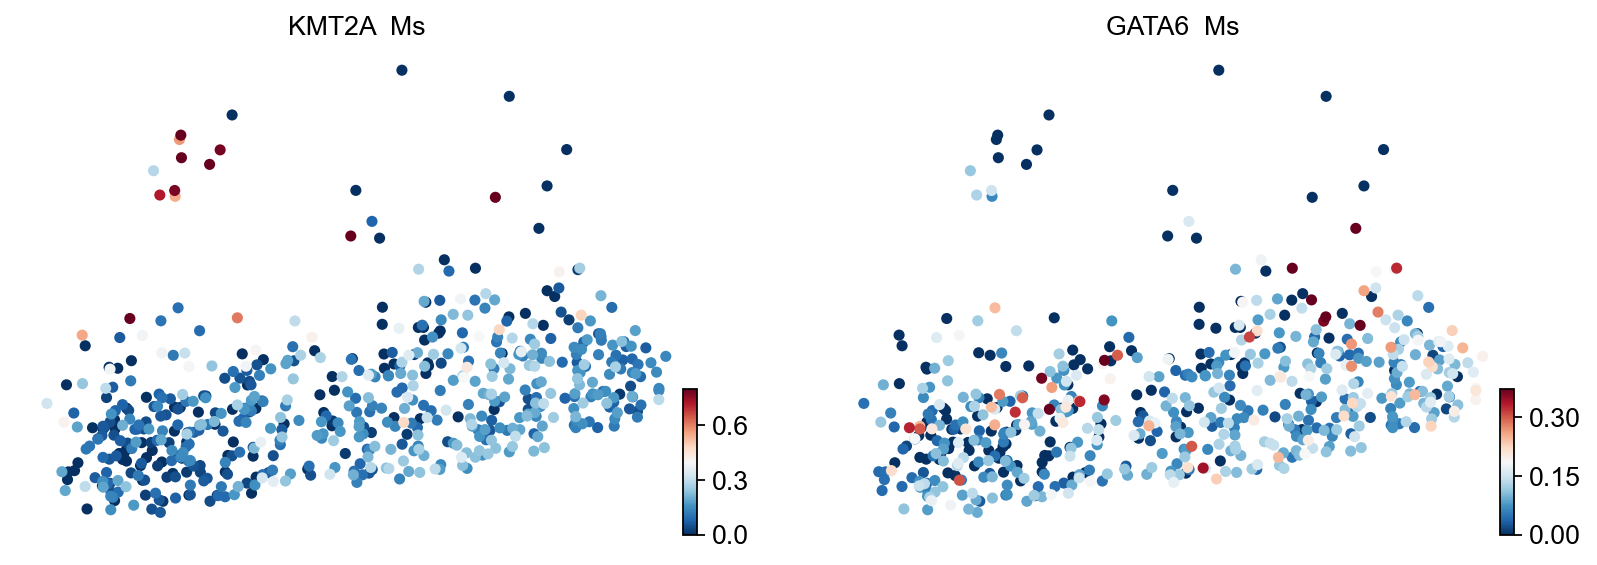

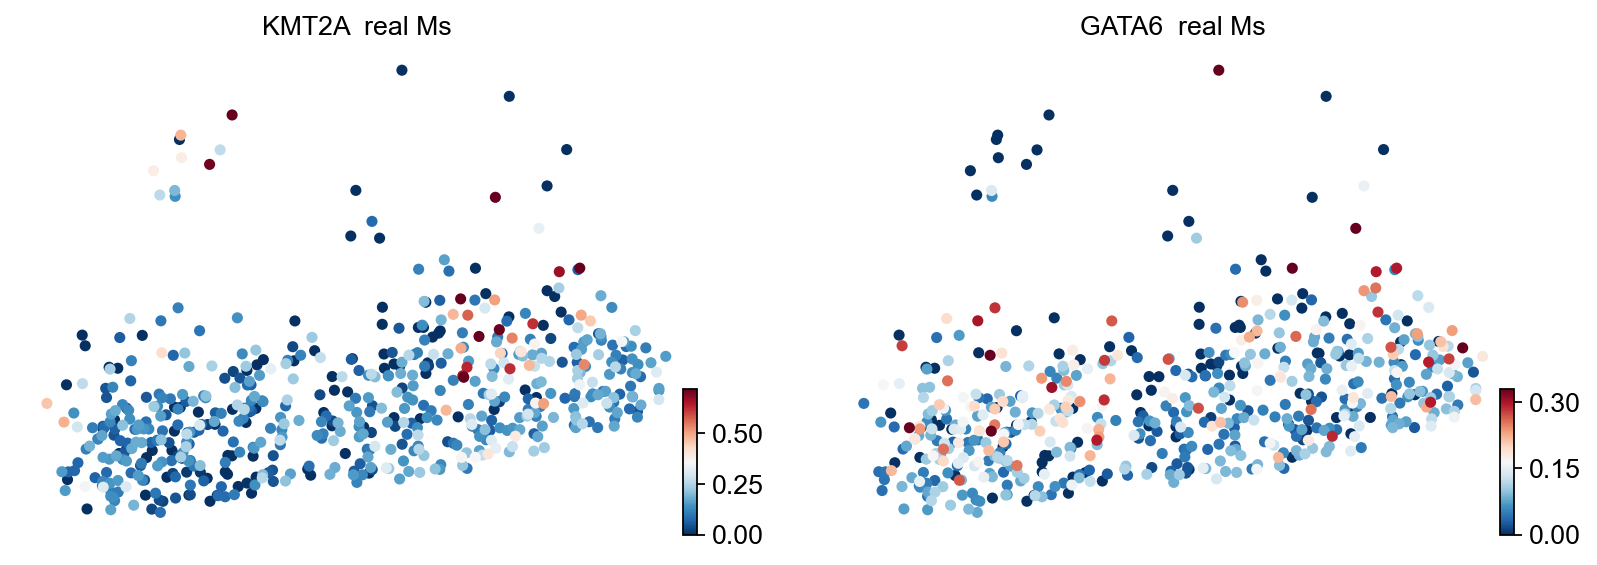

In [170]:
subdata = bdata[bdata.obs.perturbation=='DMSO'].copy()
scv.pl.scatter(subdata, color=['KMT2A', 'GATA6'], size=100)
scv.pl.scatter(subdata, color=['KMT2A', 'GATA6'], size=100, layer='Ms')
scv.pl.scatter(subdata, color=['KMT2A', 'GATA6'], size=100, layer='real_Ms')

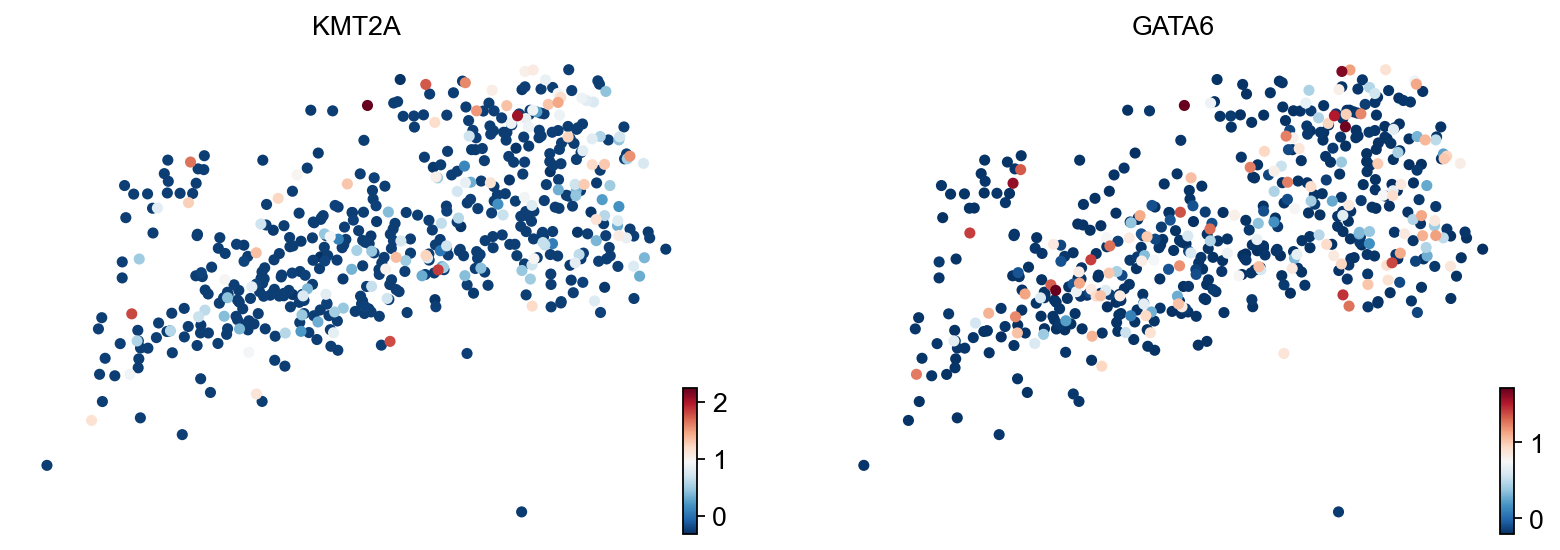

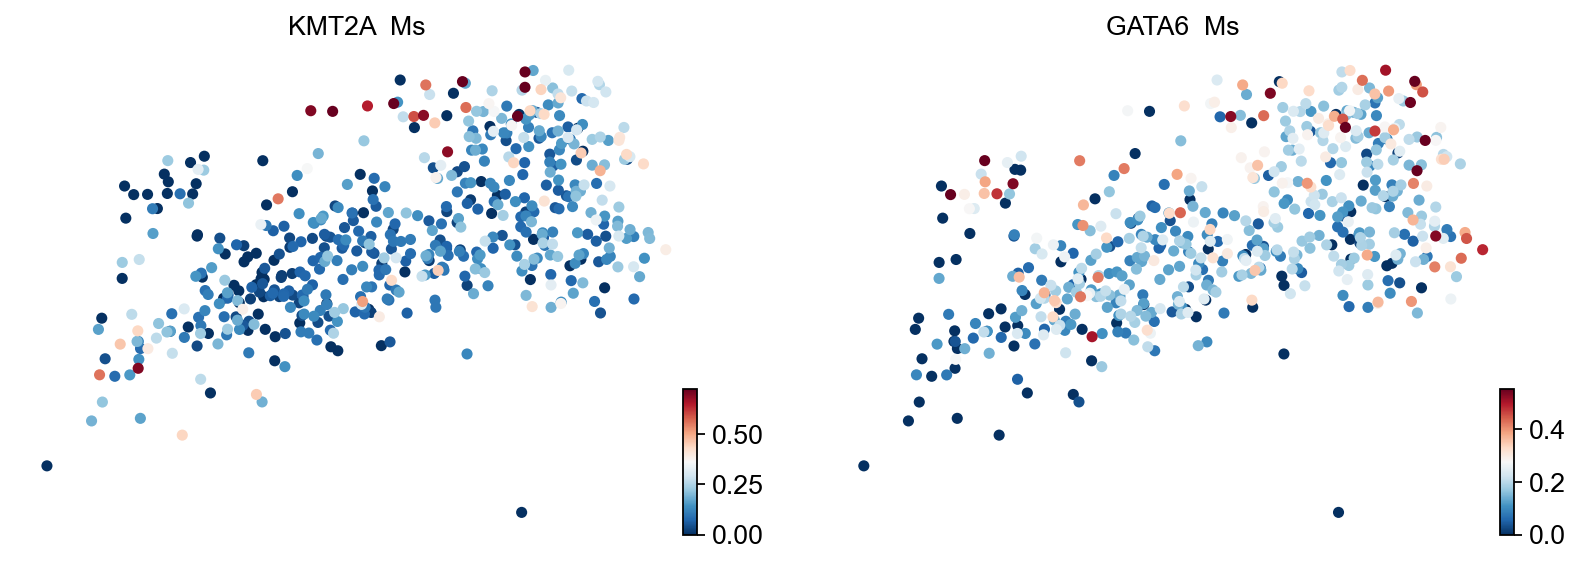

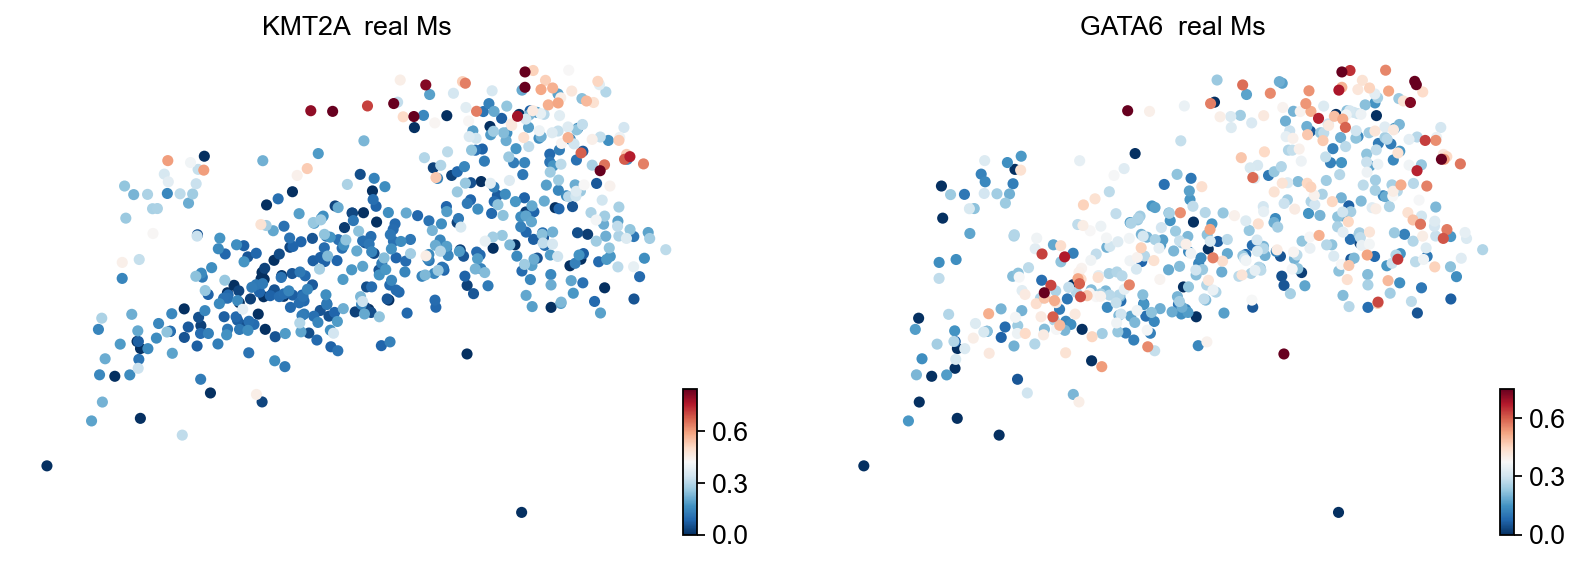

In [171]:
subdata = bdata[bdata.obs.perturbation=='EGFR'].copy()
scv.pl.scatter(subdata, color=['KMT2A', 'GATA6'], size=100)
scv.pl.scatter(subdata, color=['KMT2A', 'GATA6'], size=100, layer='Ms')
scv.pl.scatter(subdata, color=['KMT2A', 'GATA6'], size=100, layer='real_Ms')